<a href="https://colab.research.google.com/github/thedeenun/CS345_Final-project/blob/main/CS345_Income_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Income Classification

##ลักษณะของกลุ่มข้อมูล (Data Description)
หัวข้อ Income Dataset จาก https://www.kaggle.com/mastmustu/income ซึ่งเป็นข้อมูลที่มีเนื้อหาเกี่ยวกับลักษณะของประชากรที่มีรายได้มากกว่าหรือน้อยกว่า 50K

โดย Data set ที่เลือกมา มีลักษณะดังนี้

**Train Set**
* Data set characteristic : Multivariate
* Attribute characteristic : Integer, Object
* จำนวน missing values : 5767
* จำนวน Instance : 43958 
* จำนวน Attribute: 15 ดังนี้
  1. age : อายุ
  2. workclass : ประเภทของการทำงาน 
  3. fnlwgt : final weight หรือ จำนวนของกลุ่มประชากรเป้าหมาย
  4. education : ประเภทการศึกษา
  5. educational-num : ตัวเลขของการศึกษา
  6. marital-status : สถานะการสมรส
  7. occupation : อาชีพ
  8. relationship	: ความสัมพันธ์
  9. race : เชื้อชาติ
  10. gender : เพศสภาพ
  11. capital-gain : ผลกำไรจากส่วนต่างของราคาหลักทรัพย์
  12. capital-loss : ผลขาดทุนจากส่วนต่างของราคาหลักทรัพย์
  13. hours-per-week : ชั่วโมงการทำงานต่อสัปดาห์
  14. native-country	: ประเทศแต่กำเนิด
  15. income_>50K : รายได้มากกว่า 50K


**Test Set**
* Data set characteristic : Multivariate
* Attribute characteristic : Integer, Object
* จำนวน missing values : 0
* จำนวน Instance : 899 
* จำนวน Attribute: 14 ดังนี้
  1. age : อายุ
  2. workclass : ประเภทของการทำงาน 
  3. fnlwgt : final weight หรือ จำนวนของกลุ่มประชากรเป้าหมาย
  4. education : ประเภทการศึกษา
  5. educational-num : ตัวเลขของการศึกษา
  6. marital-status : สถานะการสมรส
  7. occupation : อาชีพ
  8. relationship	: ความสัมพันธ์
  9. race : เชื้อชาติ
  10. gender : เพศสภาพ
  11. capital-gain : ผลกำไรจากส่วนต่างของราคาหลักทรัพย์
  12. capital-loss : ผลขาดทุนจากส่วนต่างของราคาหลักทรัพย์
  13. hours-per-week : ชั่วโมงการทำงานต่อสัปดาห์
  14. native-country	: ประเทศแต่กำเนิด


  โดยจะใช้ลักษะของข้อมูลทั้งหมดของข้อมูลมาทำ Classification เพื่อทำนายว่าจะมีจำนวนผู้ที่มีรายได้มากกว่าหรือน้อยกว่า 5 หมื่น (income_>50K) เป็นเท่าใดบ้าง

*   Class label: income_>50K




# ขั้นตอนการเตรียมชุดข้อมูล

Import module ต่าง ๆ ที่จำเป็นต้องใช้

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import data file ทั้งสองโดย


*   train.csv เก็บไว้ในตัวแปร df_train
*   test.csv เก็บไว้ในตัวแปร df_test






In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

แสดงผลประเภทของข้อมูลของแต่ละคอมลัมน์จาก df_train

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


ใช้ isnull() เพื่อตรวจสอบว่าข้อมูลใน df_train มีค่า null หรือไม่

In [ ]:
df_train.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

ทำการ drop แถวที่มีค่า null ใน df_train ทั้งหมด

In [ ]:
df_train.dropna(axis=0, inplace=True)

แสดงผลประเภทของข้อมูลของแต่ละคอมลัมน์จาก df_test

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB


ใช้ isnull() เพื่อตรวจสอบว่าข้อมูลใน df_test มีค่า null หรือไม่

In [ ]:
df_test.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

ตรวจสอบ Class label จาก df_train ว่าเป็น Class balance หรือ Class imbalance

In [ ]:
df_train['income_>50K'].value_counts()

0    30635
1    10092
Name: income_>50K, dtype: int64

จำนวนของ income_>50K ของทั้งสอง class มีไม่เท่ากัน จึงสรุปได้ว่า df_train เป็น Class imbalance

#ขั้นตอนการแปลงข้อมูลประเภท Nominal หรือ Ordinal ให้เป็น Numerical (One hot encoding)

&emsp;การทำแปลงข้อมูลประเภท Nominal หรือ Ordinal ให้เป็น Numerical หรือเรียกว่าการทำ One hot encoding คือ การแปลงข้อมูลที่เป็นประเภท String หรือ Objict ให้เป็นค่า 0 หรือ 1 โดยจะต้องแยกย่อยคอลัมน์ที่มีอยู่ให้เป็นหลาย ๆ คอลัมน์ตามจำนวนลักษณะ(Attributes) ที่มีอยู่ในคอลัมน์นั้น เช่น คอลัมน์ gender มีลักษณะคือ Male และ Female หลังจากทำ One hot encoding คอลัมน์ gender จะหายไปกลายเป็นคอลัมน์ Male กับ Female แทน และถ้าหากแถวของข้อมูลนั้นแต่เดิมมี gender เป็น Male ก็จะเชตค่า 1 ในคอลัมน์ Male และเซตค่า 0 ในคอลัมน์ Female

> Pandas มีฟังก์ชั่น get_dummies ที่สามารถทำ One hot encoding ได้

&emsp;แต่เนื่องจาก df_train และ df_test มีลักษณะที่อยู่ในแต่ละคอลัมน์ที่ไม่เหมือนกันอยู่ จึงไม่สามารถใช้ get_dummies เพื่อทำ One hot encoding ได้ จึงทำการใช้วิธีต่อไปนี้เพื่อทำ One hot encoding สำหรับชุดข้อมูลทั้งสอง



In [ ]:
list_attribut = []
list_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for i in  list_columns:
  for j in set(df_train[i]):
    temp = j
    if j not in list_attribut:
      list_attribut.append(temp)
  for j in set(df_test[i]):
    temp = i+"_"+j
    if j not in list_attribut:
      list_attribut.append(temp)    

print(list_attribut)

['Local-gov', 'Federal-gov', 'State-gov', 'Self-emp-not-inc', 'Private', 'Without-pay', 'Self-emp-inc', 'Some-college', '11th', 'Bachelors', 'Assoc-voc', '12th', 'Masters', 'Preschool', '9th', 'HS-grad', 'Prof-school', '7th-8th', 'Doctorate', 'Assoc-acdm', '1st-4th', '5th-6th', '10th', 'Married-AF-spouse', 'Never-married', 'Divorced', 'Separated', 'Married-civ-spouse', 'Widowed', 'Married-spouse-absent', 'Prof-specialty', 'Armed-Forces', 'Handlers-cleaners', 'Other-service', 'Machine-op-inspct', 'Sales', 'Priv-house-serv', 'Craft-repair', 'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Farming-fishing', 'Protective-serv', 'Transport-moving', 'Husband', 'Other-relative', 'Wife', 'Not-in-family', 'Unmarried', 'Own-child', 'White', 'Amer-Indian-Eskimo', 'Other', 'Asian-Pac-Islander', 'Black', 'Male', 'Female', 'Iran', 'Outlying-US(Guam-USVI-etc)', 'Ecuador', 'Taiwan', 'Honduras', 'Vietnam', 'Philippines', 'France', 'Trinadad&Tobago', 'El-Salvador', 'India', 'South', 'Dominican-Republi

เพิ่มคอลัมน์ย่อยที่ได้จากการทำ one hot encoding เข้าไปใน df_train และ df_test จากนั้นเซ็ตค่าให้เป็น 0 ก่อน

In [ ]:
df_train[list_attribut] = 0
df_test[list_attribut] = 0

เซ็ตค่าเท่ากับ 1 สำหรับคอลัมน์ที่มีลักษณะจาก list_colums_onehotencode ปรากกฎอยู่

In [ ]:
for i in list_columns:
  for j in list_attribut:
    df_train.loc[df_train[i].str.contains(j,case=False),j]=1
    df_test.loc[df_test[i].str.contains(j,case=False),j]=1

ทำการ drop คอลัมน์ดั้งเดิมก่อนทำ One hot encoding ทิ้งไป

In [ ]:
df_train.drop(columns=list_columns, inplace=True)
df_test.drop(columns=list_columns, inplace=True)

จำนวนคอลัมน์ของ df_train เพิ่มขึ้นมาจาก 15 เป็น 105

จำนวนคอลัมน์ของ df_test เพิ่มขึ้นมาจาก 14 เป็น 104 เนื่องจาก df_test ไม่มี class label (income_>50K) อยู่ด้วย


In [ ]:
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)

df_train: (40727, 105)
df_test: (899, 104)


In [ ]:
df_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,Local-gov,Federal-gov,State-gov,Self-emp-not-inc,Private,Without-pay,Self-emp-inc,Some-college,11th,Bachelors,Assoc-voc,12th,Masters,Preschool,9th,HS-grad,Prof-school,7th-8th,Doctorate,Assoc-acdm,1st-4th,5th-6th,10th,Married-AF-spouse,Never-married,Divorced,Separated,Married-civ-spouse,Widowed,Married-spouse-absent,Prof-specialty,Armed-Forces,Handlers-cleaners,...,Outlying-US(Guam-USVI-etc),Ecuador,Taiwan,Honduras,Vietnam,Philippines,France,Trinadad&Tobago,El-Salvador,India,South,Dominican-Republic,Jamaica,Peru,Cambodia,Greece,Laos,Columbia,United-States,Thailand,China,Poland,Haiti,Yugoslavia,Nicaragua,Puerto-Rico,Italy,Holand-Netherlands,Guatemala,England,Germany,Mexico,Canada,Ireland,Scotland,Hungary,Portugal,Hong,Cuba,Japan
0,67,366425,16,99999,0,60,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17,244602,8,0,0,15,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,31,174201,13,0,0,40,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,58,110199,4,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25,149248,10,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,Local-gov,Federal-gov,State-gov,Self-emp-not-inc,Private,Without-pay,Self-emp-inc,Some-college,11th,Bachelors,Assoc-voc,12th,Masters,Preschool,9th,HS-grad,Prof-school,7th-8th,Doctorate,Assoc-acdm,1st-4th,5th-6th,10th,Married-AF-spouse,Never-married,Divorced,Separated,Married-civ-spouse,Widowed,Married-spouse-absent,Prof-specialty,Armed-Forces,Handlers-cleaners,Other-service,...,Outlying-US(Guam-USVI-etc),Ecuador,Taiwan,Honduras,Vietnam,Philippines,France,Trinadad&Tobago,El-Salvador,India,South,Dominican-Republic,Jamaica,Peru,Cambodia,Greece,Laos,Columbia,United-States,Thailand,China,Poland,Haiti,Yugoslavia,Nicaragua,Puerto-Rico,Italy,Holand-Netherlands,Guatemala,England,Germany,Mexico,Canada,Ireland,Scotland,Hungary,Portugal,Hong,Cuba,Japan
0,39,327120,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,32,123253,12,0,0,42,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,47,232628,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19,374262,8,0,0,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,46,311231,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#ขั้นตอนการเตรียมข้อมูลสอน ข้อมูลทวนสอบ และ ข้อมูลทดสอบ

Import module สำหรับการแบ่งส่วนข้อมูลและ module สำหรับการทำ Normalization


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

เก็บลักษณะต่าง ๆ ของชุดข้อมูลไว้ในตัวแปร X และ Class label ที่เป็นเหมือนคำตอบของชุดข้อมูลไว้ในตัวแปร y

In [ ]:
X = df_train.drop(columns='income_>50K').values
y = df_train.loc[:,['income_>50K']].values

ทำการแบ่งข้อมูลออกเป็น 2 ส่วน จากข้อมูลที่มี 100% แบ่งออกเป็นข้อมูลสอน 90% และข้อมูลทดสอบ 10%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

Normalize ตัวแปร X_train และ X_test ชุดข้อมูลที่เป็นลักษณะให้อยู่ใน range 0 กับ 1

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# ขั้นตอนการสร้างและเปรียบเทียบโมเดล

&emsp;โดยในขั้นตอนนี้จะทำการสร้างโมเดลมา 3 โมเดล ได้แก่ KNeighborsClassifier(KNN), Support Vector Machine(SVM) และ Neural Network 

&emsp;และนำโมเดลทั้ง 3 มาเปรียบเทียบค่าความแม่นยำ



Import module ต่าง ๆ สำหรับการสร้างโมเดลและการวัดประสิทธิภาพของโมเดล

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

สำหรับโมเดล KNeighborsClassifier(KNN) จำเป็นจะต้องเซ็คค่าพารามิเตอร์ n_neighbors ในการใช้โมเดล วิธีที่จะหาว่า n_neighbors ทีีเท่าไรถึงจะดีที่สุด โดยจะทำการสอนโมเดลตั้งแต่ค่า n_neighbors เท่ากับ 1 จนถึง 20 และหา Error Rate ที่เท่าไรมีน้อยที่สุดคือค่า n_neighbors ที่ดีที่สุด

Text(0, 0.5, 'Mean Error')

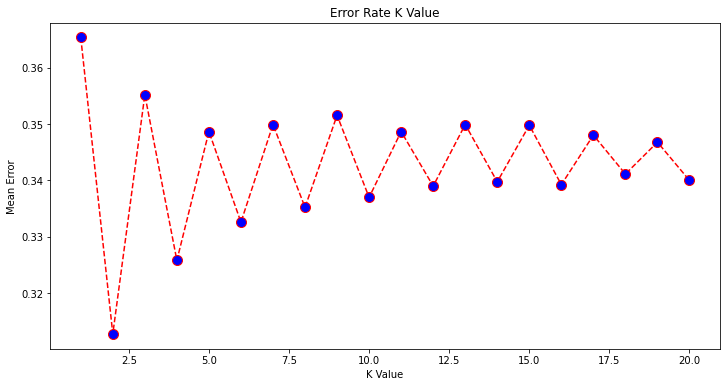

In [ ]:
error=[]
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

จะเห็นได้ว่าค่าที่ประมาณ 2 มีค่า Error rate ต่ำที่สุด จึงถูกนำไปใช้ในการทำโมเดล KNeighborsClassifier(KNN)

จากนั้นทำการสร้างโมเดลทั้ง 3 โมเดล

*   KNeighborsClassifier เซ็ตค่าพารามิเตอร์ n_neighbors=2
*   SVM เซ็คพารามืเตอร์ kernel='linear'
*   MLPClassifier เซ็คพารามิเตอร์ solver='lbfgs' และ hidden_layer_sizes=53


> hidden_layer_sizes สำหรับโมเดล Neural Network มาจากการประมาณ (จำนวนของลักษณะที่จะทำการทดสอบ/2)+1 

ในชุดข้อมูลนี้ hidden_layer_sizes = (104/2)+1 = 53







In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=2)))
models.append(('SVM', SVC(kernel='linear')))
models.append(('Neural Network', MLPClassifier(solver='lbfgs', hidden_layer_sizes=53)))

ทำการ Cross validation kfold=10 และแสดงผลค่า Accuracy ของแต่ละโมเดลออกมา

KNN: 0.806078
SVM: 0.848311
Neural Network: 0.846756



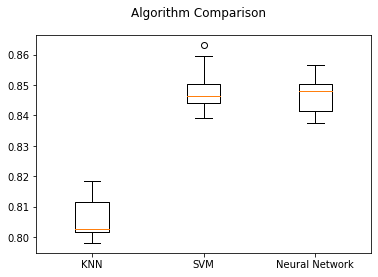

In [ ]:
results = []
names = []
for name, model in models:
	cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f' % (name, cv_results.mean()))

print()
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

เห็นได้ว่าค่า Accuracy ของ SVM และ Neural Network มีค่าที่ใกล้เคียงกันมาก

จากนั้นนำโมเดลทั้ง 3 ไปทดสอบกับชุดข้อมูลสอนใหม่ X_train, y_train 

และนำไปทำนายกับชุดข้อมูลทดสอบ X_test

และวัดค่าประสิทธิภาพกับชุดข้อมูลทวนสอบ y_train

In [ ]:
print("Prediction accuracy")
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  result = metrics.accuracy_score(y_test, y_pred)
  print('%s: %f' % (name, result))
  
print("\nf1_score")
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  result = f1_score(y_test, y_pred)
  print('%s: %f' % (name, result))

Prediction accuracy
KNN: 0.812914
SVM: 0.842131
Neural Network: 0.841395

f1_score
KNN: 0.505195
SVM: 0.630672
Neural Network: 0.653573


ค่าที่แสดงผลออกมาเป็นค่า Accuracy และ F1_score
จะเห็นได้ว่าค่า Accuracy ในครั้งนี้เมื่อเทียบกับค่า Accuracy จากการทำ Cross validation จะมีค่าที่ใกล้เคียงกันมาก ทำให้บอกได้ว่าโมเดลทั้ง 3 ไม่เกิดการ Underfitting และ Overfitting

# ขั้นตอนการเลือกโมเดลในการจำแนกข้อมูล

ในขั้นตอนนี้จะเลือกโมเดลที่มีค่า Accuracy มากที่สุดจากขั้นตอนที่แล้วนั้นคือ Neural Network มาปรับใช้ต่อ

In [ ]:
target_names = ['class 0', 'class 1']

สร้างโมเดล Neural Network และเซ็คพารามิเตอร์เป็น solver='lbfgs', hidden_layer_sizes=(53,28), max_iter=300

ในรอบนี้จะเพิ่ม จำนวน hidden_layer เป็น 2 layers layer แรกมี 53 nodes layer ที่สองมี 28 nodes และเพิ่ม max_iter คือจำนวนรอบในการทดสอบเป็น 300 ครั้ง

In [ ]:
NeuralNet = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(53,28), max_iter=100)
NeuralNet.fit(X_train, y_train)
y_pred_NeuralNet = NeuralNet.predict(X_test)
print("Confustion Matrix: \n",confusion_matrix(y_test, y_pred_NeuralNet))
print()
print(classification_report(y_test, y_pred_NeuralNet, target_names=target_names))
print()
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_NeuralNet))

Confustion Matrix: 
 [[2846  231]
 [ 406  590]]

              precision    recall  f1-score   support

     class 0       0.88      0.92      0.90      3077
     class 1       0.72      0.59      0.65       996

    accuracy                           0.84      4073
   macro avg       0.80      0.76      0.77      4073
weighted avg       0.84      0.84      0.84      4073


Accuracy:  0.8436042229315002


ซึ่งผลลัพธ์ที่ได้ออกมามีค่า Accuracy ที่ใกล้เคียงกัน

จากนั้นก็ลองมา tune จำนวนครั้งในการทดสอบโดยให้เริ่มจาก 100 ไปจนถึง 1000 ครั้ง

Text(0, 0.5, 'Accuracy')

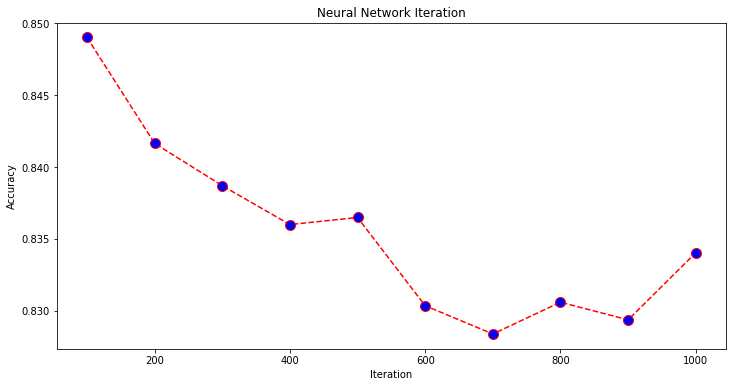

In [ ]:
accuracy = []
for i in range(100, 1100, 100):
  model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=53, max_iter=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
  #print('iter %d: %f' % (i, metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(12, 6))
plt.plot(range(100, 1100, 100), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Neural Network Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

กราฟที่ได้แสดงให้เห็นว่าถ้าเพิ่มจำนวนรอบในการทดสอบ (max_iter) แต่ละครั้งจะได้ค่า Accuracy จะยิ่งลดลงอย่างมีนัยสำคัญ

#ขั้นตอนการทดสอบกับชุดข้อมูลทดสอบ Post-process

ในขั้นตอนนี้จะนำ df_test ที่ไม่มี Class label อยู่ มาทำนาย Class label โดยใช้โมเดล Neural Network จากขั้นตอนที่แล้ว

In [ ]:
df_test2 = df_test.values
df_test2 = scaler.transform(df_test2)
y_pred_df_test = NeuralNet.predict(df_test2)
df_test_with_class = df_test.copy()
df_test_with_class['income_>50K'] = y_pred_df_test

In [ ]:
df_test_with_class['income_>50K'].value_counts()

0    723
1    176
Name: income_>50K, dtype: int64

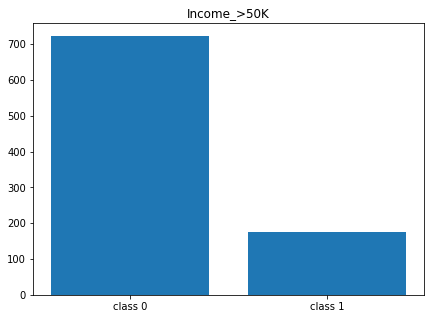

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(target_names,df_test_with_class['income_>50K'].value_counts())
plt.title("Income_>50K")
plt.show()

&emsp;จะเห็นได้ว่าจากการทำนาย Income_>50K ของชุดข้อมูล df_test ข้อมูลส่วนใหญ่อยู่ใน class 0 ซึ่งหมายความว่าจำนวนประชากรส่วนใหญ่จากชุดข้อมูลนี้มีรายได้ที่ต่ำกว่า 50K 

&emsp;สามารถสรุปได้ว่าชุดข้อมูล Income Dataset มีลักษณะที่เป็น Class imbalance ซึ่งมี Class label (Income_>50K) ที่มีค่าเป็น class 0 มากกว่า class 1 มาก ทำให้การทำนายของโมเดลมีความเอนเอียงไปกับค่าที่เป็น class 0 มาก ซึ่งอาจจะบอกได้ว่าโมเดลนี้ Overfit กับ class 0 ถึงแม้ว่าการวัดจากค่า accuracy จากการทำ Cross validation และ fit model มีค่าเท่าที่ใกล้เคียงกันก็ตาม

# ดาวน์โหลด Data set หลังการทำ Pre-process 

In [ ]:
df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')
df_test_with_class.to_csv('df_test_with_class.csv')

# รายชื่อผู้จัดทำ

นายอาดีนัน อับดุลลี 6209650719